In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
#---------------------------------------
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')


2025-04-15 21:45:12.442424: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 21:45:12.449482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744731912.457291  534284 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744731912.459574  534284 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744731912.465781  534284 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load Training Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
tr_df = train_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Training')
tr_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
...,...,...
5707,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5708,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5709,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5710,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma


# Load Test Data

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing')
ts_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
...,...,...
1306,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1307,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1308,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1309,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma


# Number of images in each class in train data

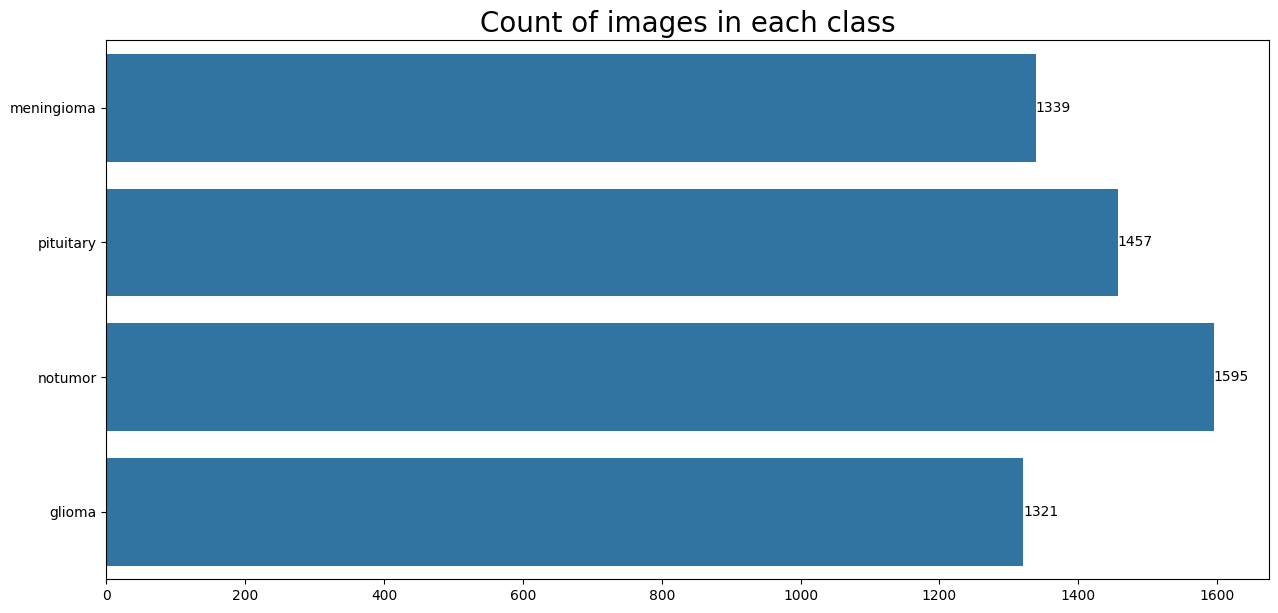

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

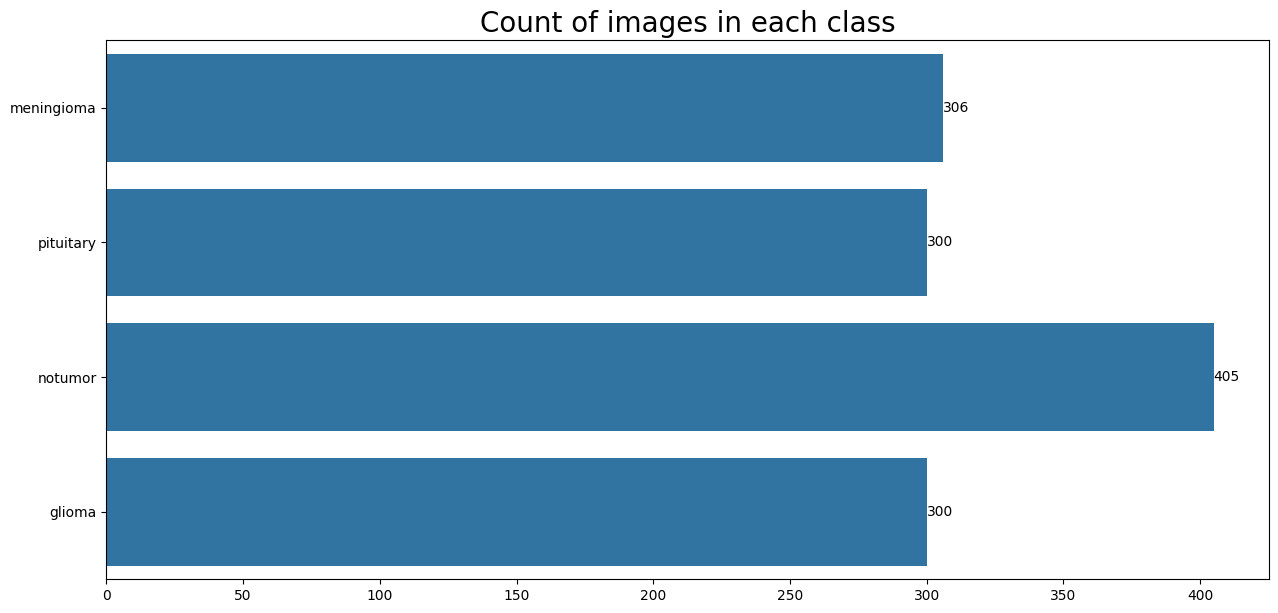

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Splitting dataset

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
1297,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
18,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
367,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,pituitary
73,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1120,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
...,...,...
1070,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
860,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,notumor
1284,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
194,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

batch_size = 32
img_size = (299, 299)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

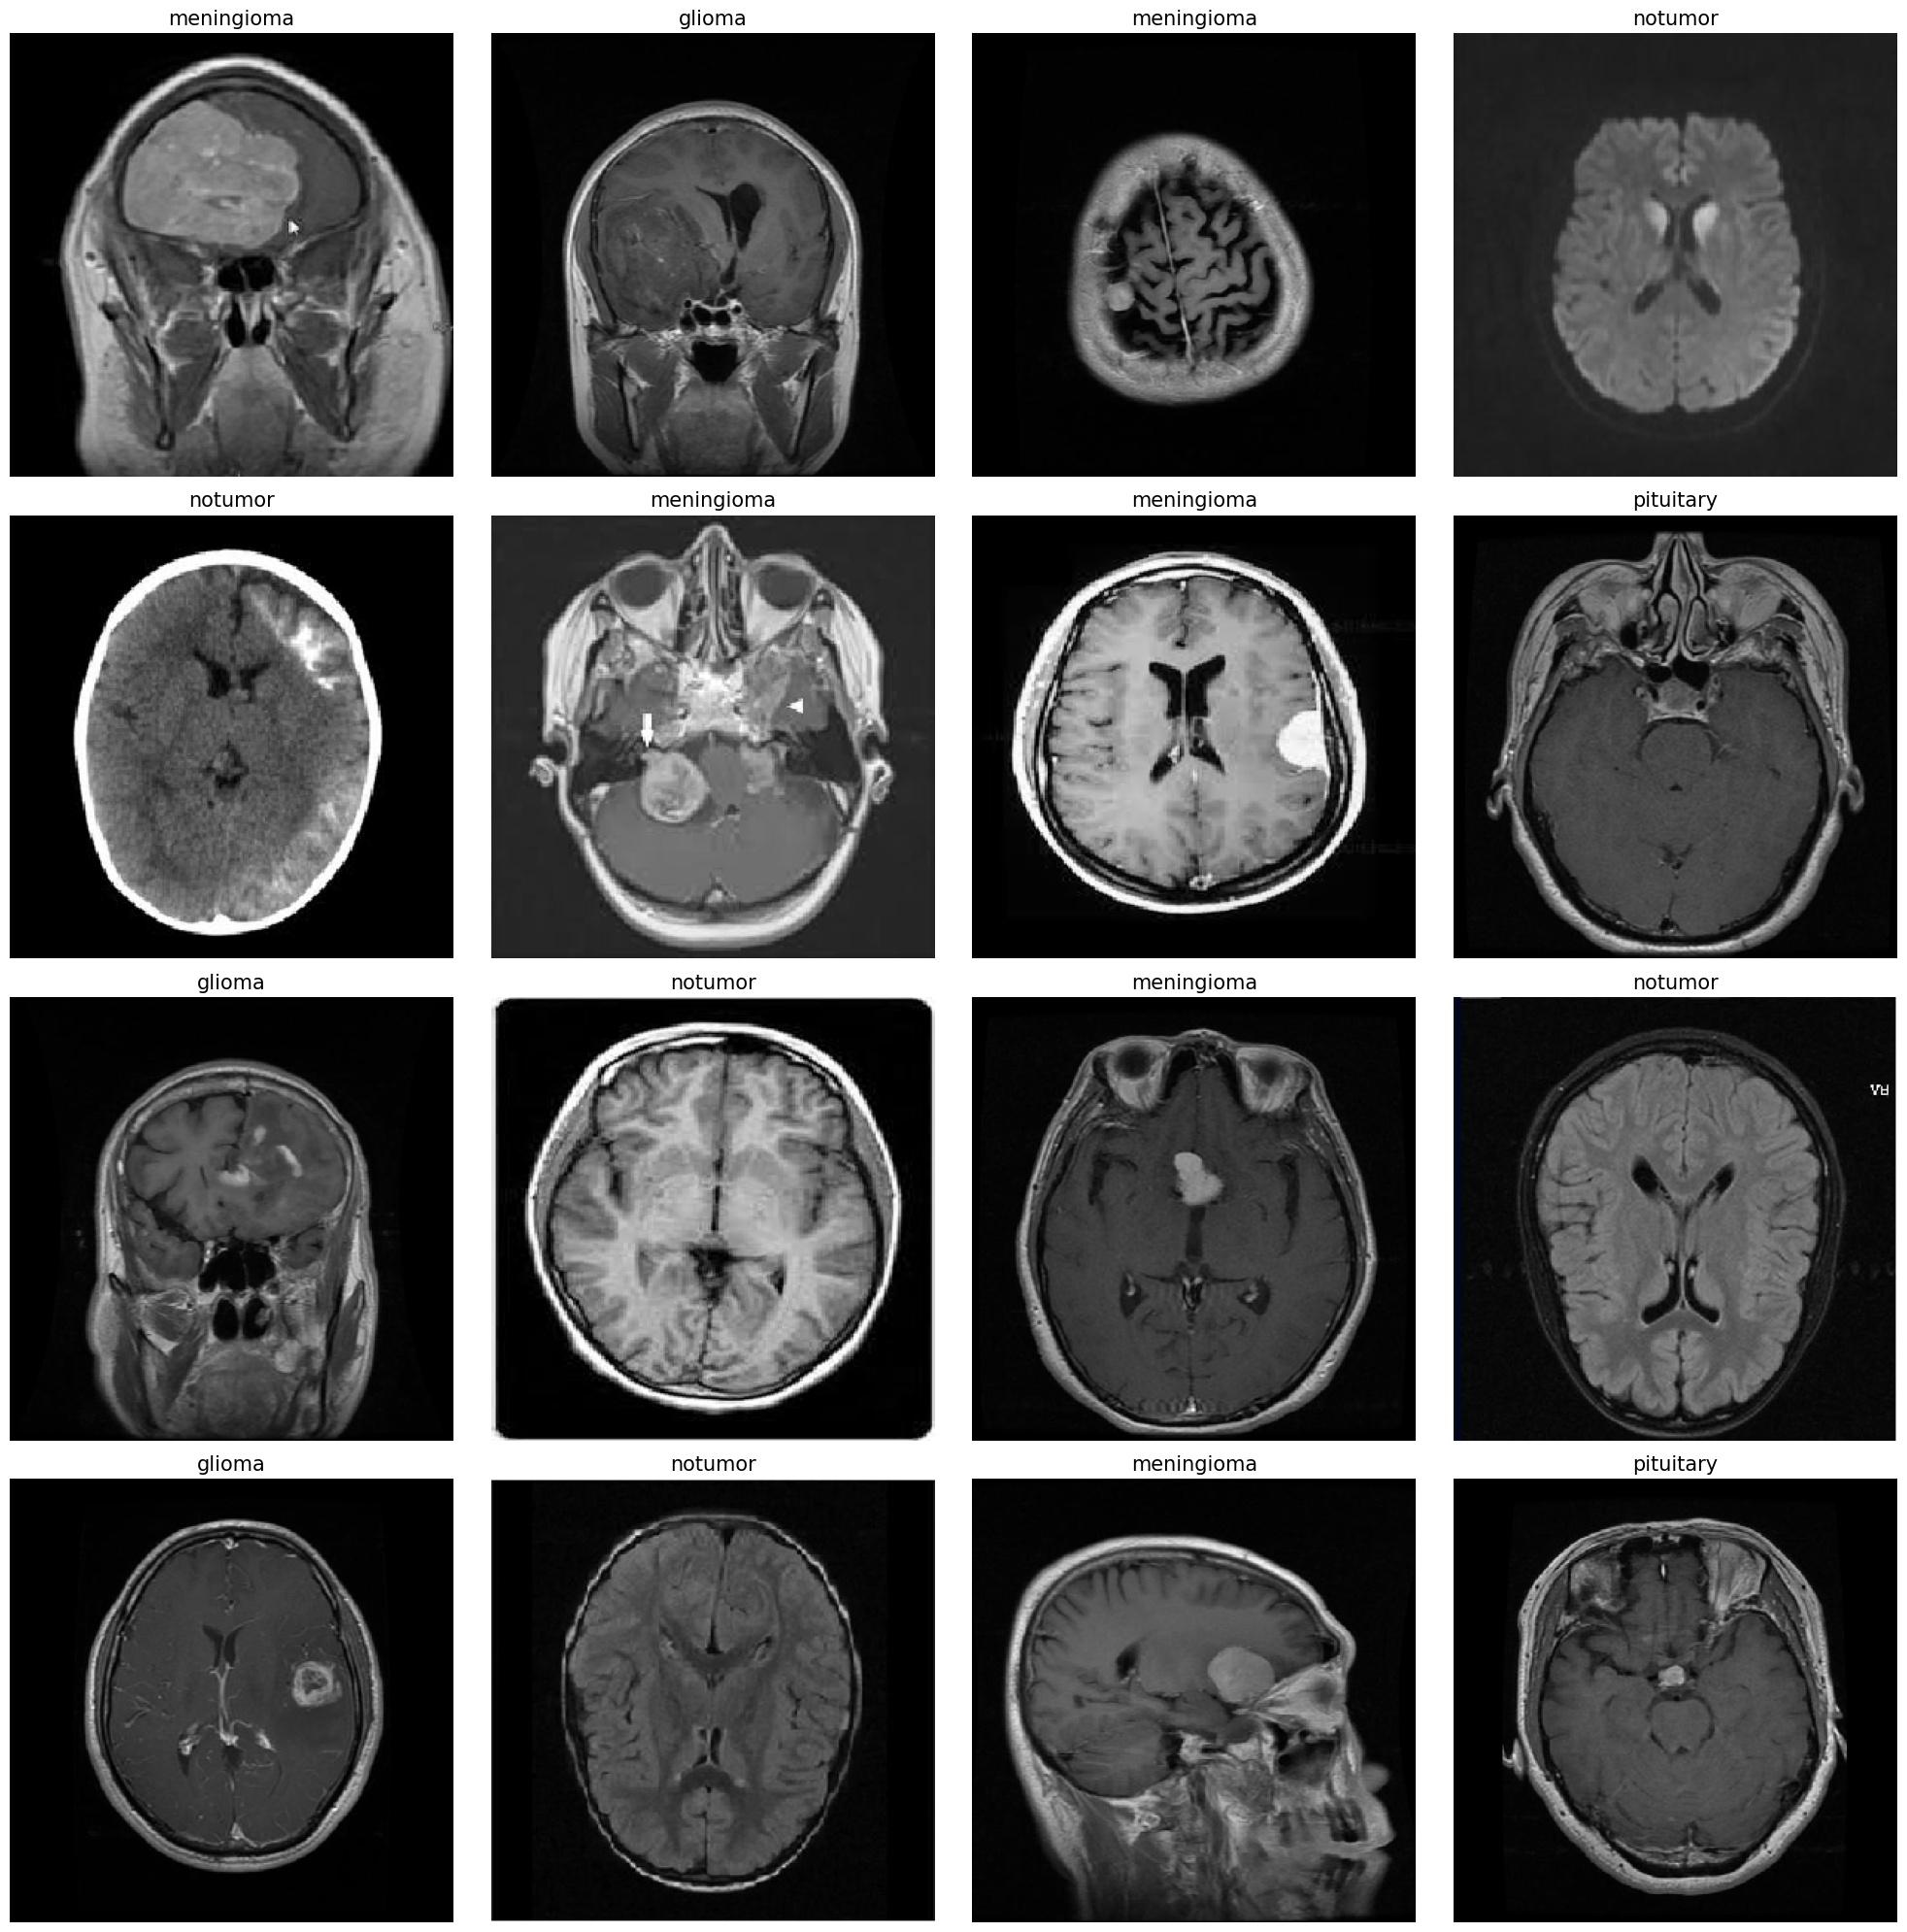

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)
    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building the model

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Image shape and number of classes
img_shape = (299, 299, 3)
num_classes = 4

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

# Load InceptionV3 base model
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape
)

# Freeze initial layers
base_model.trainable = True
for layer in base_model.layers[:200]:
    layer.trainable = False

# Pooling: GlobalAverage + GlobalMax
avg_pool = layers.GlobalAveragePooling2D()(base_model.output)
max_pool = layers.GlobalMaxPooling2D()(base_model.output)
concat_pool = layers.Concatenate()([avg_pool, max_pool])

# Fully connected layers
x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat_pool)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Output layer
output = layers.Dense(num_classes, activation='softmax')(x)

# Final model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Add label_smoothing=0.1 if needed
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()


I0000 00:00:1744731914.178691  534284 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 996 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 26,134,436 (99.69 MB)

 Trainable params: 19,133,636 (72.99 MB)

 Non-trainable params: 7,000,800 (26.71 MB)

# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000


I0000 00:00:1744731921.620904  534438 service.cc:152] XLA service 0x7e97ac015970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744731921.620916  534438 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-15 21:45:21.815342: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744731923.105525  534438 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-15 21:45:24.237529: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15831', 120 bytes spill stores, 120 bytes spill loads

2025-04-15 21:45:24.324733: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15

  1/179 ━━━━━━━━━━━━━━━━━━━━ 46:26 16s/step - accuracy: 0.1250 - loss: 20.8229 - precision: 0.1500 - recall: 0.0938

I0000 00:00:1744731931.319363  534438 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 292ms/step - accuracy: 0.6678 - loss: 18.4700 - precision: 0.7035 - recall: 0.6352 - val_accuracy: 0.8779 - val_loss: 14.7421 - val_precision: 0.8942 - val_recall: 0.8641
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.9110 - loss: 13.7978 - precision: 0.9203 - recall: 0.9017 - val_accuracy: 0.9435 - val_loss: 11.3043 - val_precision: 0.9462 - val_recall: 0.9405
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.9422 - loss: 10.6486 - precision: 0.9481 - recall: 0.9357 - val_accuracy: 0.9710 - val_loss: 8.8437 - val_precision: 0.9739 - val_recall: 0.9695
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.9596 - loss: 8.3746 - precision: 0.9627 - recall: 0.9577 - val_accuracy: 0.9725 - val_loss: 7.0637 - val_precision: 0.9739 - val_recall: 0.9679
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.9703 - loss: 6.7220 - precision: 0.9716 - recall: 0.9677 - val_accuracy: 0.97

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

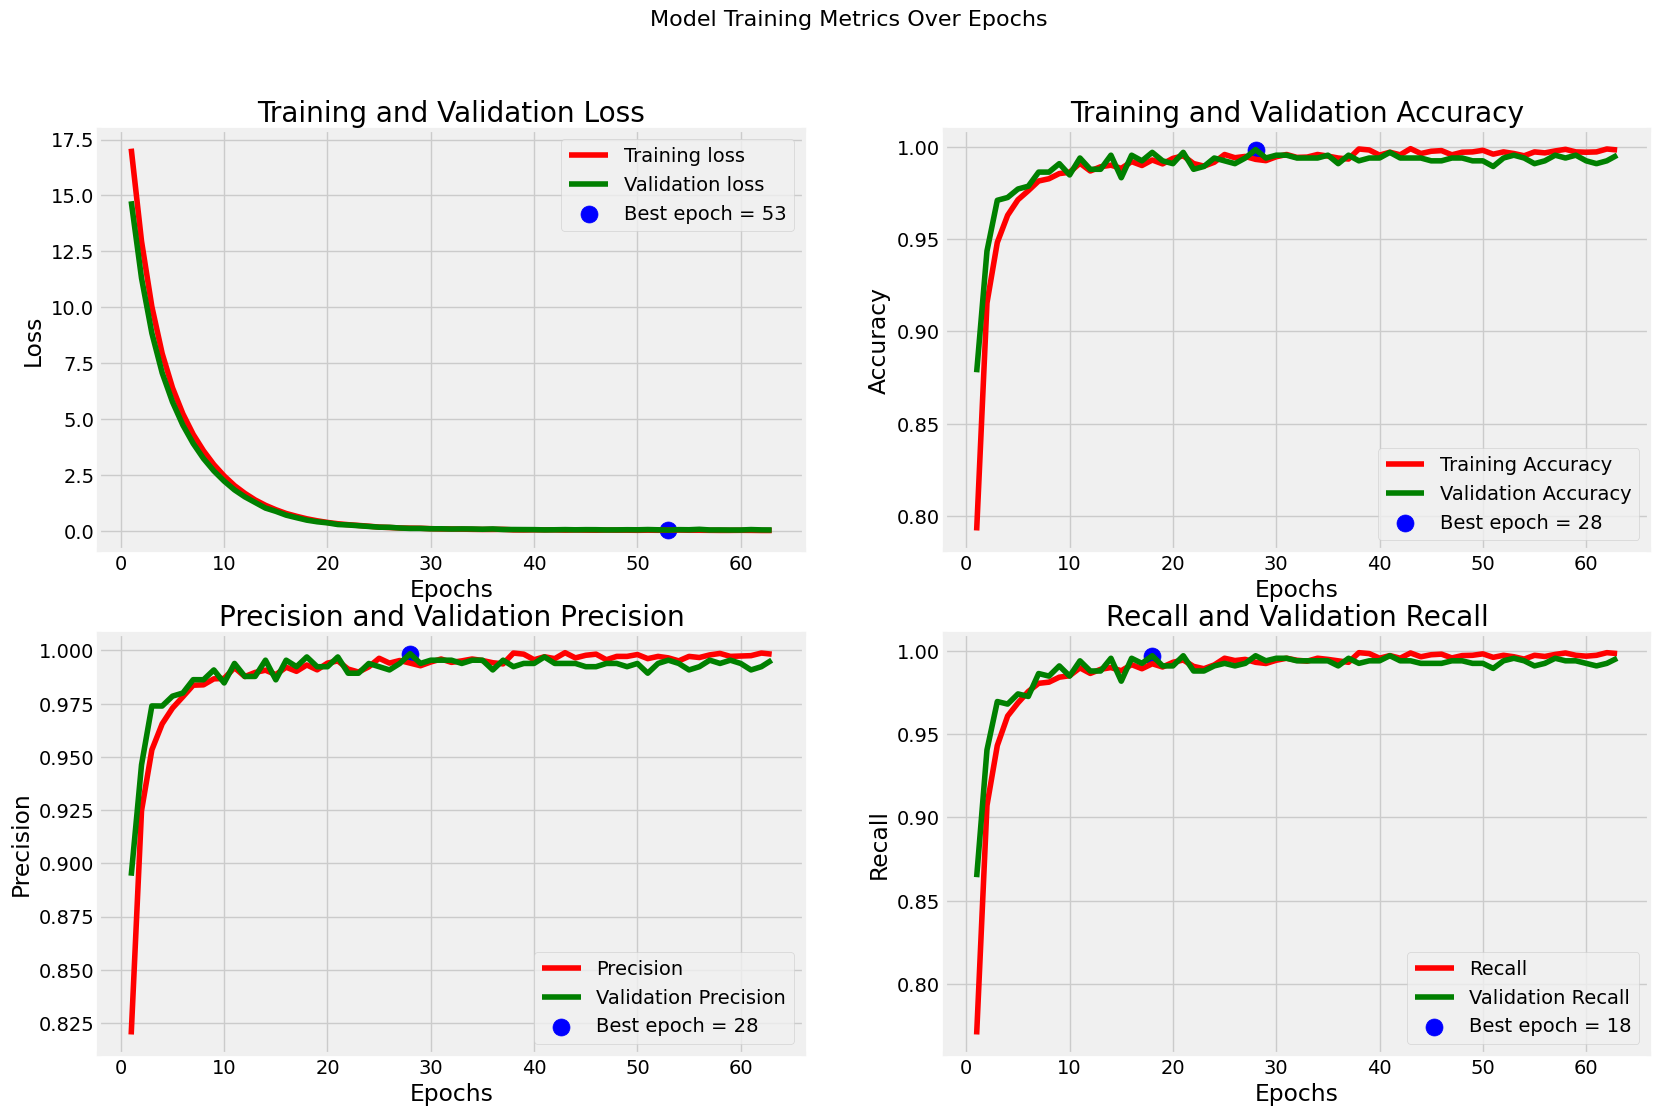

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

print(test_score)

179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 0.9992 - loss: 0.0206 - precision: 0.9992 - recall: 0.9989
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9985 - loss: 0.0227 - precision: 0.9985 - recall: 0.9985
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9978 - loss: 0.0287 - precision: 0.9978 - recall: 0.9968
Train Loss: 0.0215
Train Accuracy: 99.88%
--------------------
Validation Loss: 0.0343
Validation Accuracy: 99.54%
--------------------
Test Loss: 0.0314
Test Accuracy: 99.70%
[0.031368911266326904, 0.9969512224197388, 0.9969465732574463, 0.9954268336296082]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


# Confusion matrix

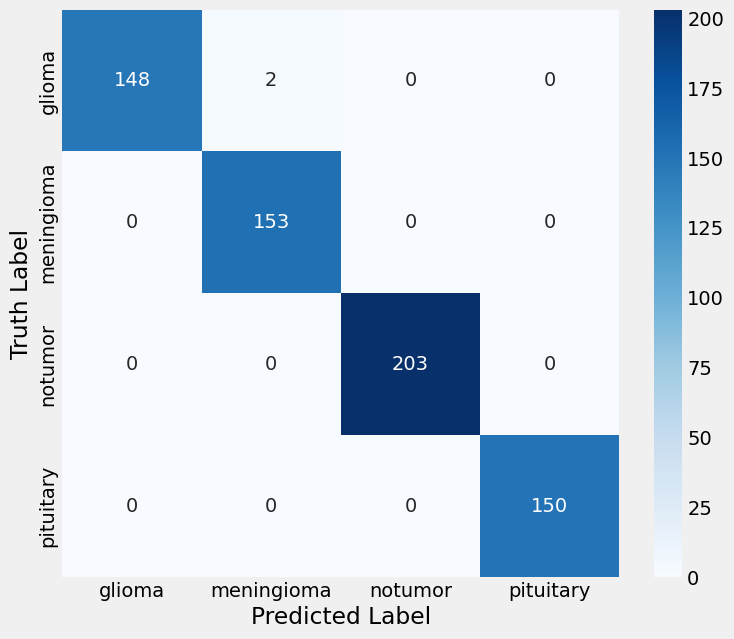

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


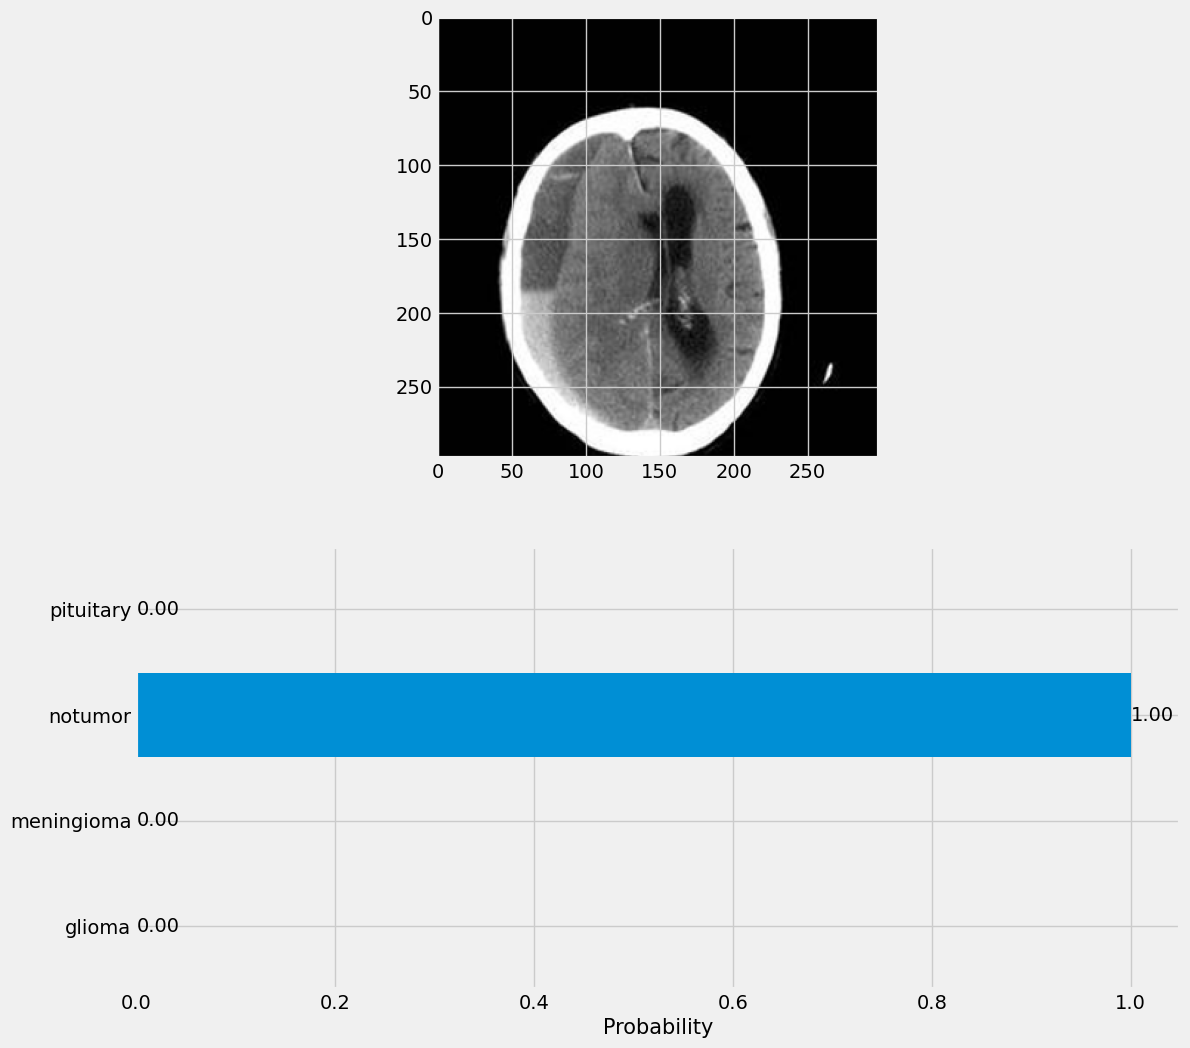

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/notumor/Te-noTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


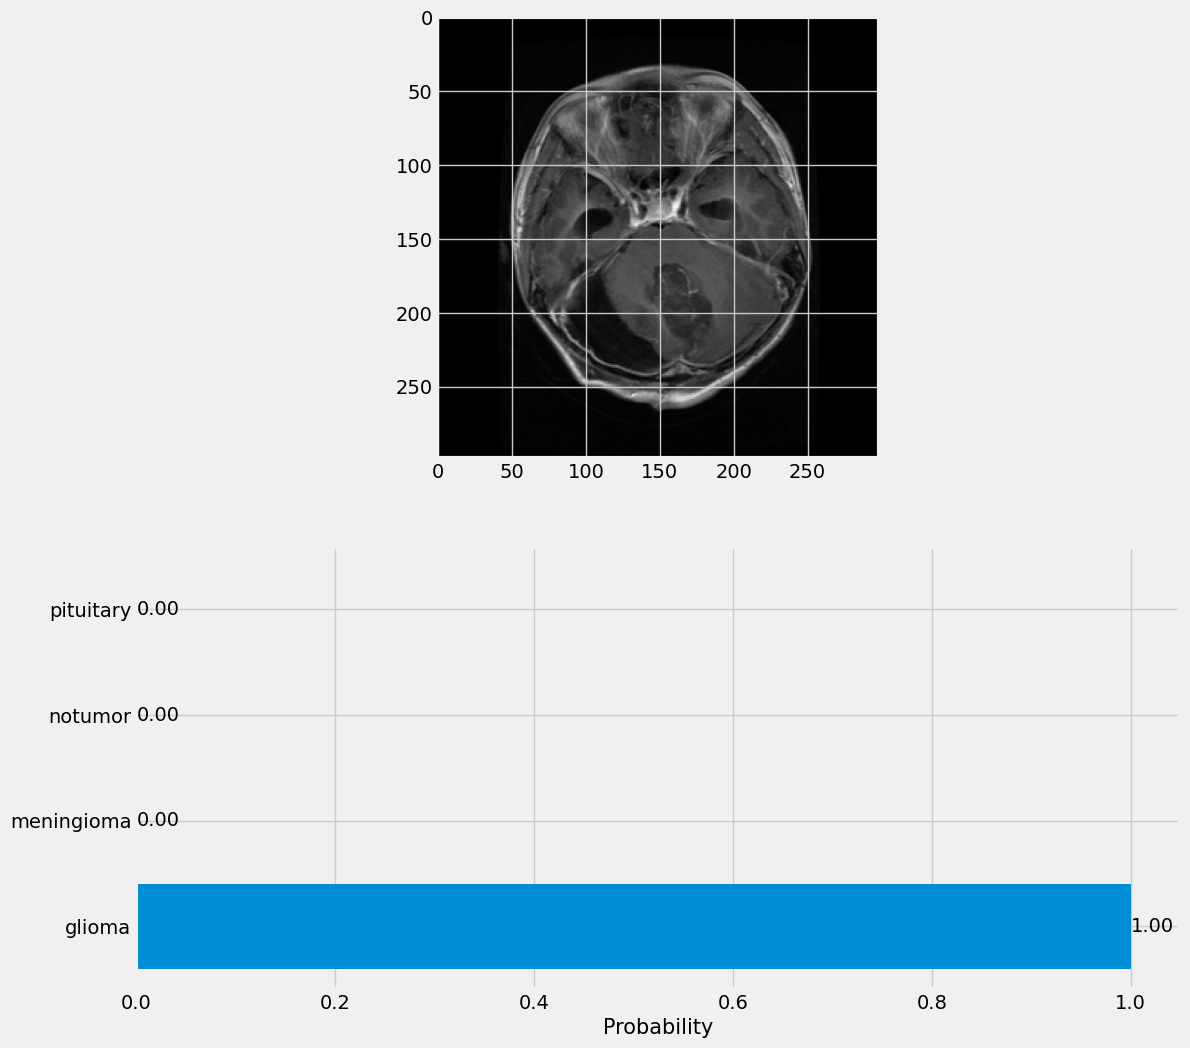

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


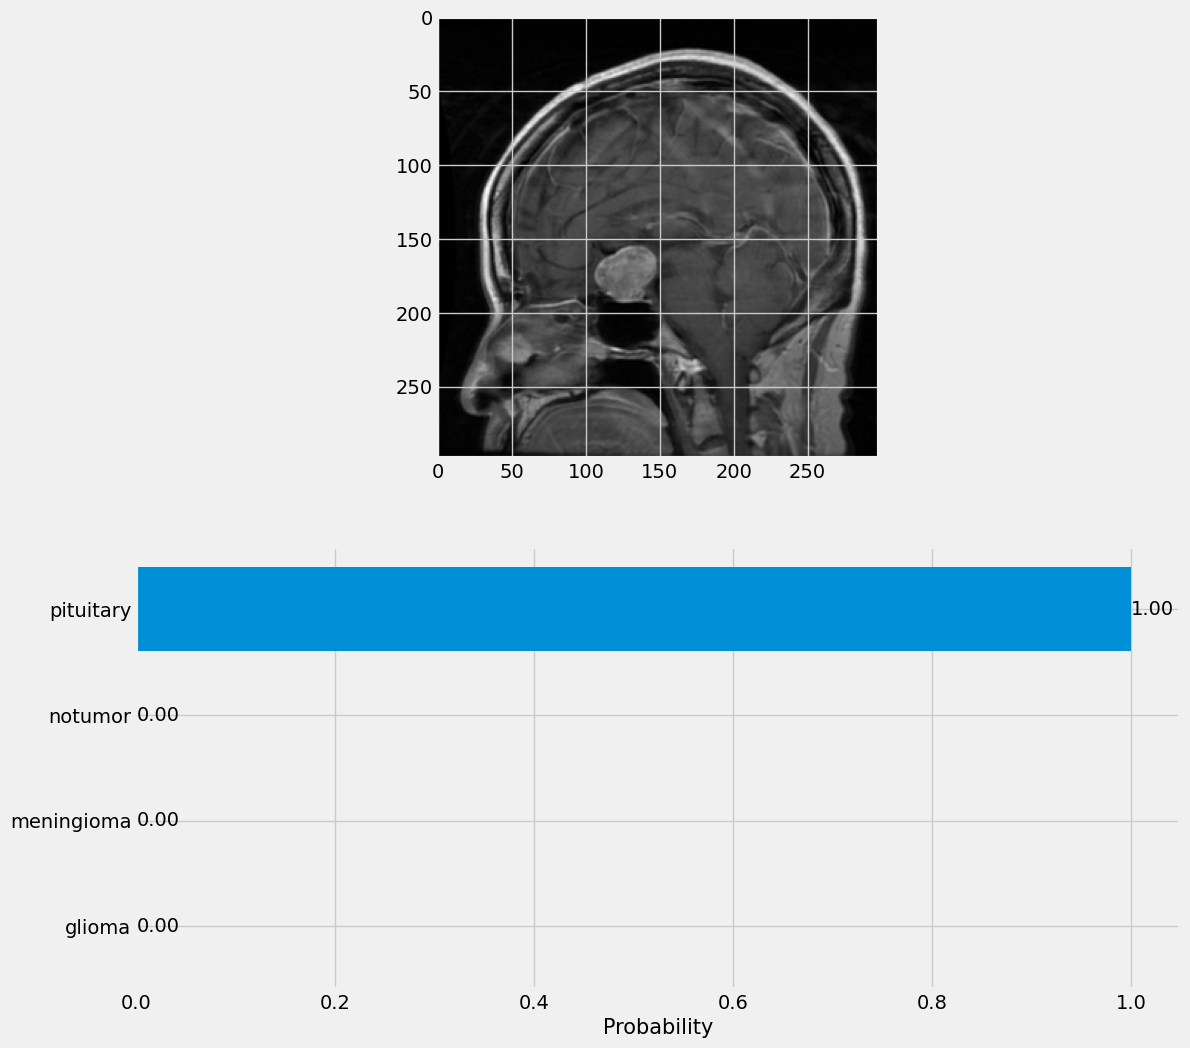

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/pituitary/Te-piTr_0008.jpg')

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()